In [ ]:
# Note use in PyCharm, does not work in notebook

In [6]:
import sys
import cv2, os, glob
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from ciirc_utils import resize, grayscale, showimage, dilate, gaussian_blur, threshold

In [7]:
os.listdir("images/")

['utm_00001.jpg', 'canny1.jpg', 'utm_00000.mask.png']

In [8]:
#reading in an image
input_images = [cv2.imread(img_path)  for img_path in glob.glob("images/*")]

In [12]:
def hatch(image):
    """
    A naive hatching implementation that takes an image and returns the image in 
    the style of a drawing created using hatching.
    image: an n x m single channel matrix.
    returns: an n x m single channel matrix representing a hatching style image.
    """
    xdogImage = xdog(image, 0.1)

    hatchTexture = cv2.imread('./textures/hatch.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE)

    height = len(xdogImage)
    width = len(xdogImage[0])

    if height > 1080 or width > 1920:
        print ("This method only supports images up to 1920x1080 pixels in size")
        sys.exit(1)

    croppedTexture = hatchTexture[0:height, 0:width]

    return xdogImage + croppedTexture

def xdog(image, epsilon=0.01):
    """
    Computes the eXtended Difference of Gaussians (XDoG) for a given image. This 
    is done by taking the regular Difference of Gaussians, thresholding it
    at some value, and applying the hypertangent function the the unthresholded
    values.
    image: an n x m single channel matrix.
    epsilon: the offset value when computing the hypertangent.
    returns: an n x m single channel matrix representing the XDoG.
    """
    phi = 10

    difference = dog(image, 200, 0.98)/255
    diff = difference*image

    for i in range(0, len(difference)):
        for j in range(0, len(difference[0])):
            if difference[i][j] >= epsilon:
                difference[i][j] = 1
            else:
                ht = np.tanh(phi*(difference[i][j] - epsilon))
                difference[i][j] = 1 + ht

    return difference*255

def dog(image, k=200, gamma=1):
    """
    Computes the Difference of Gaussians (DoG) for a given image. Returns an image 
    that results from computing the DoG. 
    image: an n x m array for which the DoG is computed.
    k: the multiplier the the second Gaussian sigma value.
    gamma: the multiplier for the second Gaussian result.
  
    return: an n x m array representing the DoG
    """

    s1 = 0.5
    s2 = s1*k

    gauss1 = gaussian_filter(image, s1)
    print("gauss1 = ", gauss1)
    gauss_temp = gaussian_filter(image, s2)
    print("gauss_temp = ", gauss_temp)
    gauss2 = gamma*gauss_temp

    differenceGauss = gauss1 - gauss2
    return differenceGauss



gauss1 =  [[ 43  44  43 ... 139 140 140]
 [ 42  42  42 ... 139 139 140]
 [ 42  42  42 ... 139 139 140]
 ...
 [ 89  91  96 ... 182 183 183]
 [ 97  97  97 ... 184 184 184]
 [ 99 100  97 ... 184 184 184]]
gauss_temp =  [[107 107 107 ... 125 125 125]
 [107 107 107 ... 125 125 125]
 [107 107 107 ... 125 125 125]
 ...
 [111 111 111 ... 133 133 133]
 [111 111 111 ... 133 133 133]
 [111 111 111 ... 133 133 133]]


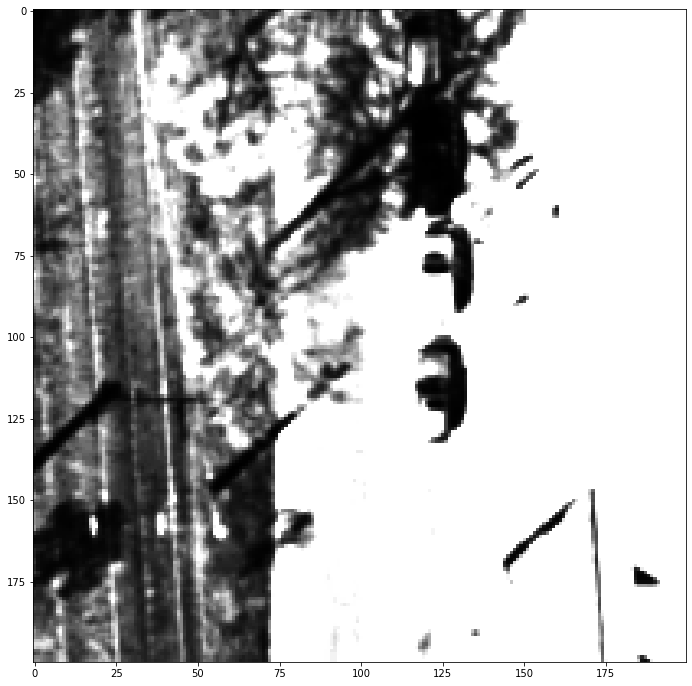

In [13]:
# Main method defaults to computiong the eXtended Diference of Gaussians
grayscaled_image = grayscale(input_images[0])
resized_image = resize(grayscaled_image, (200, 200))
xdog_image = xdog(resized_image)
showimage(xdog_image, cmap = "gray")